In [25]:
import pandas as pd

In [26]:
df=pd.read_csv('/home/diya/practice/Dataset/digit_recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.shape

(42000, 785)

In [28]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31305,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import matplotlib.pyplot as plt

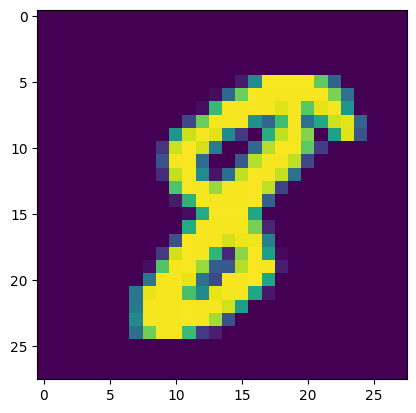

In [30]:
plt.imshow(df.iloc[24075,1:].values.reshape(28,28))

In [31]:
X=df.iloc[:,1:]  #all rows and 1 onwoards columns 
y=df.iloc[:,0]   #all rows and 0 columns

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
X_train.shape

(33600, 784)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#  KNN: calculating distance of each particular img from all imgs so we could see similar img from our given distance 
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
import time 

start = time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

17.64923858642578


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [39]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# using pca 
from sklearn.decomposition import PCA

pca=PCA(n_components=100)

In [42]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [43]:
X_train_trf.shape

(33600, 100)

In [24]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [45]:
y_pred=knn.predict(X_test_trf)

In [46]:
accuracy_score(y_test,y_pred)

0.9541666666666667

after applying pca i tranformed data to 100 from 784 dimensional

In [47]:
# repeating everthing in loop
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    accuracy_score(y_test,y_pred)
    print(accuracy_score(y_test,y_pred))

0.25892857142857145
0.32404761904761903
0.5103571428571428
0.665952380952381
0.7375
0.8225
0.8429761904761904
0.8728571428571429
0.8859523809523809
0.9055952380952381
0.9108333333333334
0.9182142857142858
0.9275
0.9361904761904762
0.9383333333333334
0.9384523809523809
0.9407142857142857
0.94
0.9433333333333334
0.9432142857142857
0.9434523809523809
0.9445238095238095
0.9442857142857143
0.9452380952380952
0.9482142857142857
0.9479761904761905
0.9475
0.9478571428571428
0.9484523809523809
0.9501190476190476
0.9496428571428571
0.9522619047619048
0.950952380952381
0.9510714285714286
0.9511904761904761
0.9517857142857142
0.9511904761904761
0.9517857142857142
0.9533333333333334
0.9523809523809523
0.9521428571428572
0.9516666666666667
0.9527380952380953
0.9522619047619048
0.9545238095238096
0.9530952380952381
0.9544047619047619
0.9539285714285715
0.9529761904761904
0.9527380952380953


KeyboardInterrupt: 

In [ ]:
# transforming to a 2D coordinate system

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [49]:
X_train_trf

array([[-2.71864803, -0.48938426],
       [-0.67691241, -6.75346454],
       [-3.03330253,  6.50924756],
       ...,
       [ 2.14885552,  0.78050252],
       [ 1.05955894,  0.94819368],
       [17.70259282,  1.96196112]])

In [ ]:
# used plotly bcoz it shows 0,1,2,.... on hovering that points 

import plotly.express as px  
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show() 

In [52]:
 
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [53]:
X_train_trf

array([[-2.71863667, -0.48958808,  1.13560322],
       [-0.67702831, -6.75395426, -2.33597193],
       [-3.03317051,  6.50977539,  7.49270923],
       ...,
       [ 2.14885341,  0.78041655, -0.74707479],
       [ 1.0595646 ,  0.94818943,  3.94943678],
       [17.70254604,  1.96205071, -4.94433619]])

In [54]:

y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show() 

In [ ]:
# eigen values
pca.explained_variance_

array([40.67111197, 29.17023394, 26.74459592])

In [ ]:
# eigen vectors
pca.components_

array([[-1.27578750e-17,  1.49509422e-18,  6.82739100e-21, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.12291724e-17, -1.72666422e-17,  9.70583350e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-5.11696317e-17,  6.62258579e-17, -1.88713002e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [57]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [58]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [60]:
pca.explained_variance_.shape

(784,)

In [62]:
import numpy as np

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

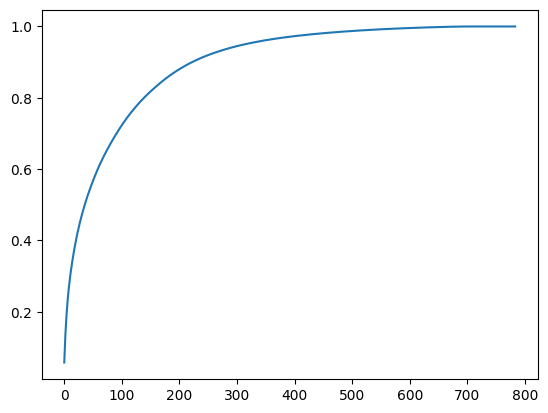

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))